# W207 Summer 2018 Final Project - EDA
### Divya Gorantla, Ram Iyer, Tiffany Jaya, Steve Sanders

### Outline for EDA:

import packages/classes  
read data file  
plot histograms for continuous-variable features  
identify features having missing values  
quantify missing values    
calculate and plot correlation coefficients from initial dataset (uses just the numerical columns)    
perform initial baseline with Random Forest Classifier
drop features that are highly correlated with other features?  
explore feature normality and potential transformations  
explore new composite and/or modified variables  

In [48]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix   

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.grid_search import GridSearchCV   # THIS HAS BEEN DEPRECATED
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *


'''
import matplotlib.pylab as plt 
import numpy as np 
from scipy import sparse 
from sklearn.datasets import make_classification, make_blobs, load_boston 
from sklearn.decomposition import PCA 
from sklearn.cross_validation import ShuffleSplit, train_test_split, Bootstrap 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.learning_curve import learning_curve 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV 
from pprint import pprint 
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 
import urllib 
import seaborn


#- See more at: https://shankarmsy.github.io/posts/forest-cover-types.html#sthash.AM2YEAiA.dpuf

'''




'\nimport matplotlib.pylab as plt \nimport numpy as np \nfrom scipy import sparse \nfrom sklearn.datasets import make_classification, make_blobs, load_boston \nfrom sklearn.decomposition import PCA \nfrom sklearn.cross_validation import ShuffleSplit, train_test_split, Bootstrap \nfrom sklearn.preprocessing import StandardScaler \nfrom sklearn import metrics \nfrom sklearn.learning_curve import learning_curve \nfrom sklearn.linear_model import LinearRegression \nfrom sklearn.ensemble import GradientBoostingRegressor \nfrom sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier \nfrom sklearn.model_selection import GridSearchCV \nfrom pprint import pprint \nimport pandas as pd \nfrom pandas.tools.plotting import scatter_matrix \nimport urllib \nimport seaborn\n\n\n#- See more at: https://shankarmsy.github.io/posts/forest-cover-types.html#sthash.AM2YEAiA.dpuf\n\n'

In [7]:
train=pd.read_csv('train.csv', index_col='Id') 
test=pd.read_csv('test.csv', index_col='Id') 
orig_train = train.copy() 
orig_test = test.copy() 

In [16]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (15120, 55)
test shape: (565892, 54)


In [13]:
print(train.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [15]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,...,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,...,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,2561.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The test set does not have the "Cover_Type" response column.

In [17]:
train.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There are no "null" cells in the train data set.  

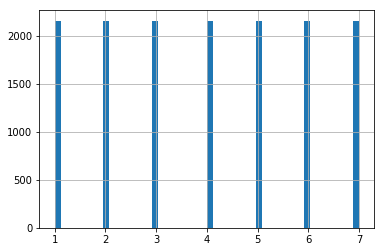

In [38]:
# Look at the output variable: Cover_Type

train.Cover_Type.hist(bins=50) 
plt.show()

The train data has a uniform distribution of Cover_Type values.

In [19]:
# There are 10 continuous-variable features in this data
continuous_var = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e2f6518>,
      dtype=object)

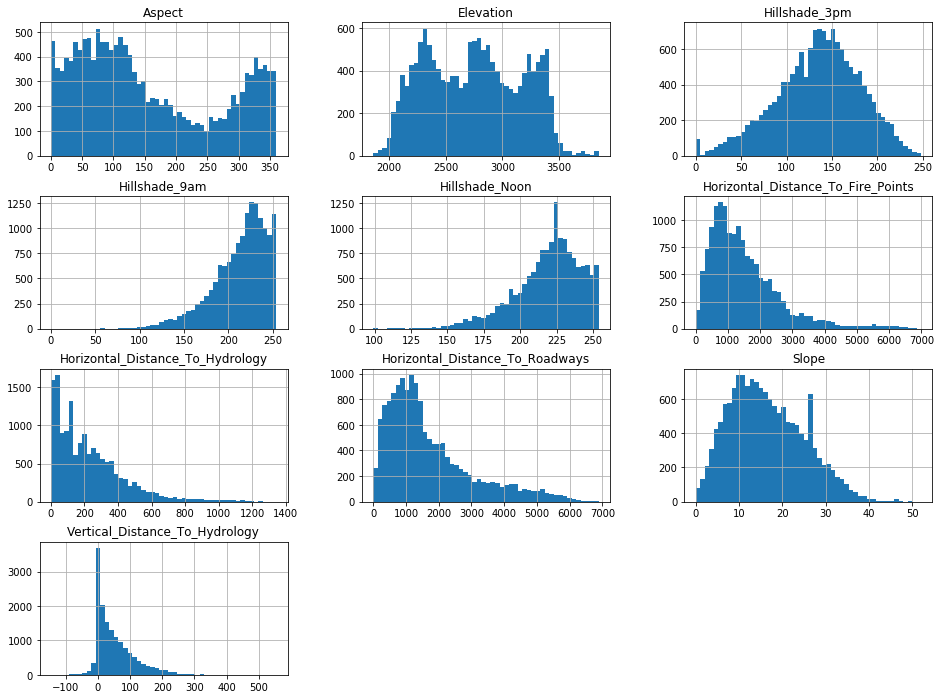

In [40]:
# Look at the continuous features:
train.iloc[:,:10].hist(figsize=(16,12),bins=50)

### Observations from histograms of continuous-variable features:
Aspect is rotational, so the value at 360 degrees should equal the value at 0 degrees.  (This represents the compass direction that the slope (surface of the hill) faces, based on azimuth angle, where 0 degrees is North and 90 degrees is East.)  

Elevation appears to have 3 modes.  

Hillshade_3pm has several zero values that appear to be out of place (i.e., "missing values"). 
Hillshade_9am and Hillshade_Noon are truncated at 255, which is the maximum value of the index.  

The distance-based features have substantial right-hand skew.   

Slope appears to have extra data at a value around 27 degrees.  

Vertical_Distance_to_Hydrology has several negative values.  


In [25]:
train[continuous_var].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


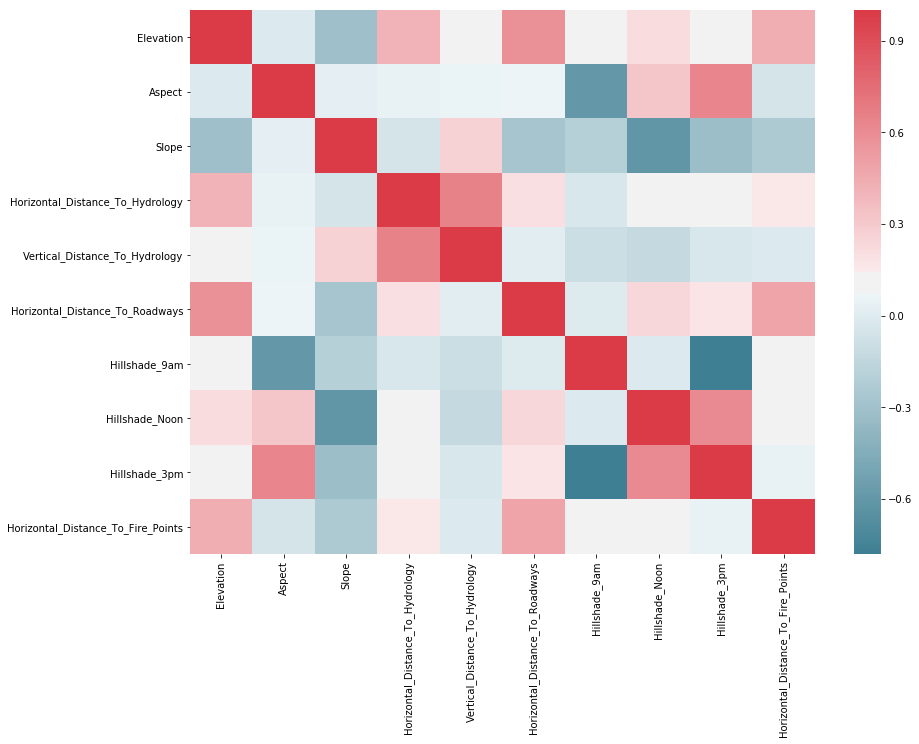

In [28]:
# plot correlation map of continuous features in train data

plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)   #Creates a Matplotlib color map
correlations = train[continuous_var].corr()
# print correlations
print(sns.heatmap(correlations, cmap=cmap))

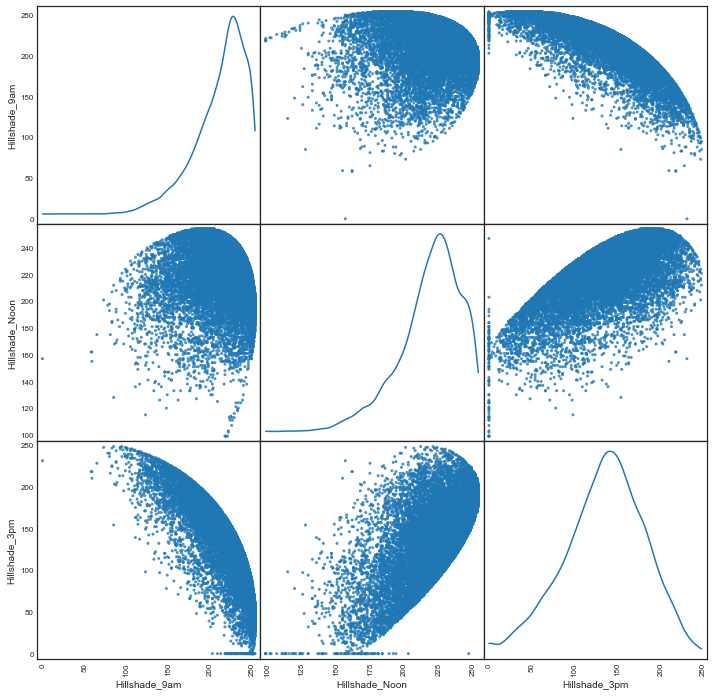

In [34]:
# See how Hillside features are related.

with seaborn.axes_style('white'): 
    hillside = train[['Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm']] 
    scatter_matrix(hillside, alpha=0.8, figsize=(12, 12), diagonal="kde") 
    plt.show() 

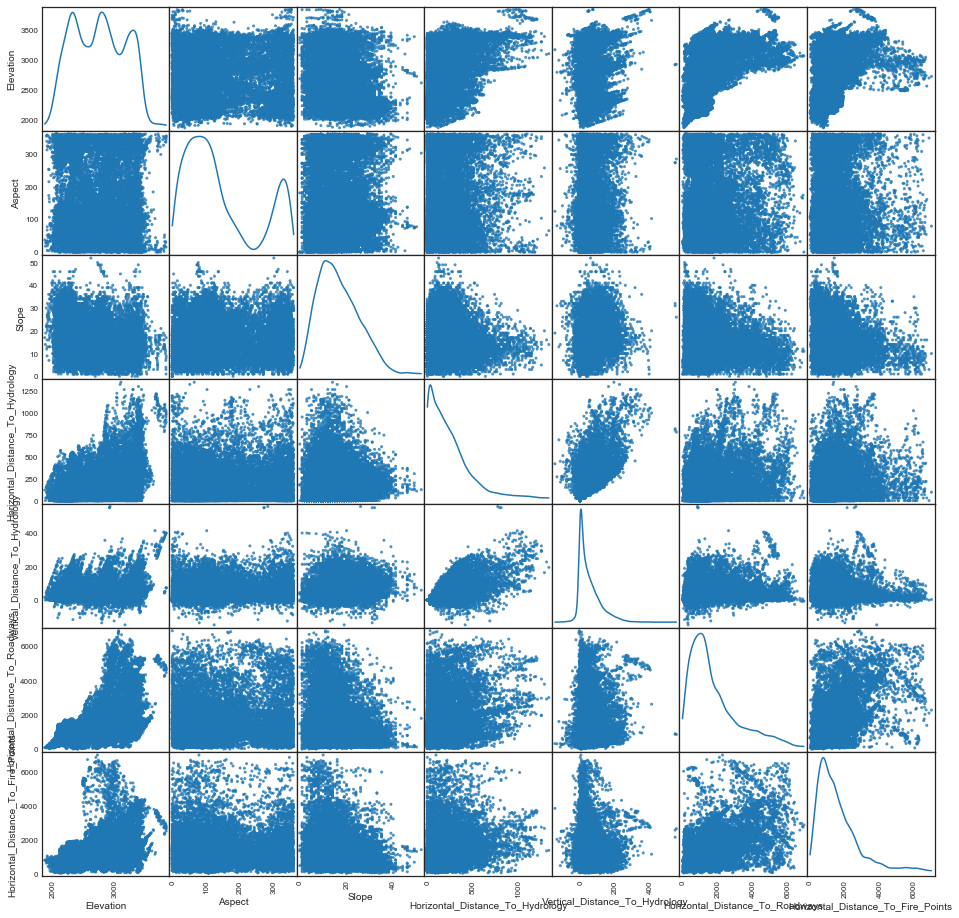

In [37]:
# See how the other continuous features are related.

with seaborn.axes_style('white'): 
    other_cont = train[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']] 
    scatter_matrix(other_cont, alpha=0.8, figsize=(16, 16), diagonal="kde") 
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5faa6e80>,
      dtype=object)

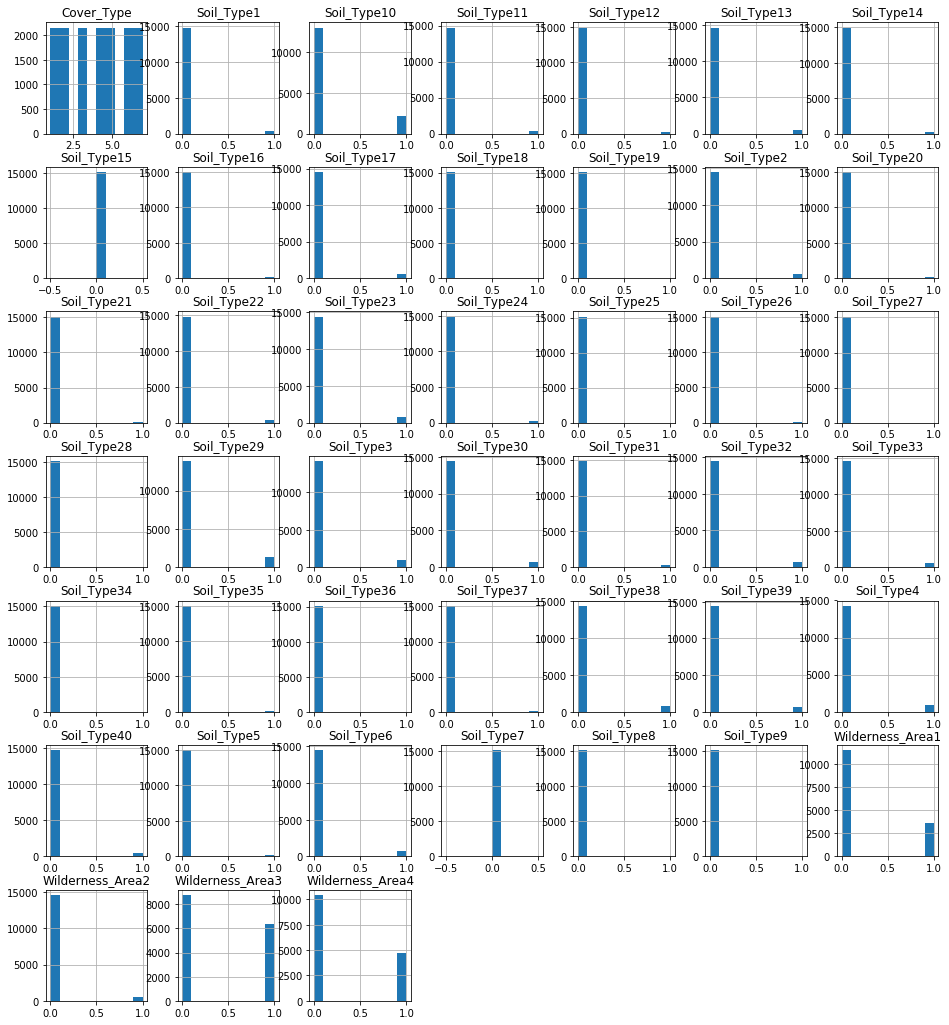

In [46]:
# Look at the binary features:
train.iloc[:, 10:].hist(figsize=(16,18),bins=10)

Several soil types are under-represented, including 7 and 15, which have no representation.

Wilderness_Area2 is under-represented relative to the other 3 Wilderness_Area types.

In [49]:
# "Quick and Dirty" Random Forest Classifier baseline fit as a starting point.

#Initial Random Forest Model fitting with 1000 estimators. Note below, that the labels lie in the last column, Cover Type.
rf_initial=RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)
rf_initial.fit(train.iloc[:,:-1].values, train.iloc[:,-1:].values.ravel())  # ravel returns the flattened underlying data as an ndarray
print('Initial Train score: %.2f' %rf_initial.score(train.iloc[:,:-1].values, train.iloc[:,-1:].values.ravel()))

Initial Train score: 1.00


The RFC fit the train data perfectly.  Now predict using the test data.

In [50]:
#Make a copy of the test file 
temp_test = test.copy() 

#Run Predictions on temp_test
temp_test['Cover_Type'] = rf_initial.predict(temp_test.values) 


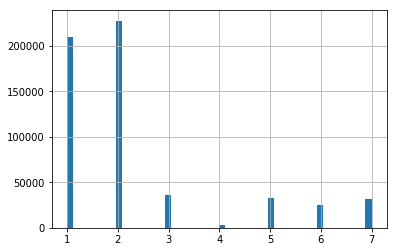

In [51]:
# There are no test labels to compare to, so just plot the distribution of the predicted classes.  

temp_test.Cover_Type.hist(bins=50) 
plt.show()

We observe that the predicted Cover_Type classes from the test data are highly weighted toward Cover_Type's 1 and 2.  

### Observations/Questions 
The test set does not have the "Cover_Type" response column.  
There are no "null" cells in the train data set.   
The train data has a uniform distribution of Cover_Type values.  
Aspect is rotational, so the value at 360 degrees should equal the value at 0 degrees.  
Elevation appears to have 3 modes.  
Hillshade_3pm has several zero values that appear to be out of place (i.e., "missing values"). 
Hillshade_9am and Hillshade_Noon are truncated at 255, which is the maximum value of the index.  
The distance-based features have substantial right-hand skew.   
Slope appears to have extra data at a value around 27 degrees.  
Vertical_Distance_to_Hydrology has several negative values.   
Several soil types are under-represented, including 7 and 15, which have no representation.  
Wilderness_Area2 is under-represented relative to the other 3 Wilderness_Area types.  
Ran a Random Forest Classifier to get an initial baseline.  The RFC fit the train data perfectly. The predicted Cover_Type classes from the test data are highly weighted toward Cover_Type's 1 and 2. 

Are we assuming this data were all collected "simultaneously"?  If collected over a number of weeks/months, then I would expect a time dependence, particularly with the Hillside variables.  



### To Do  
submit baseline test predictions to Kaggle to get result of test predictions?  (From Ref 4., expect ~ 0.75 accuracy.)
further examine the binary features; consider consolidation (e.g., perhaps rocky vs. non-rocky soil)?  
quantify missing values  
drop features that are highly correlated with other features?  
explore feature normality and potential transformations (e.g., log transforms)   
explore new composite and/or modified (input) variables  
construct weighting factors to compensate for non-uniform predicted test labels?  
  

### References
1. https://www.kaggle.com/c/forest-cover-type-kernels-only  
2. http://nbviewer.jupyter.org/github/aguschin/kaggle/blob/master/forestCoverType_featuresEngineering.ipynb  
3. https://cseweb.ucsd.edu/~jmcauley/cse255/reports/wi15/Yerlan_Idelbayev.pdf  
4. https://shankarmsy.github.io/posts/forest-cover-types.html  
5. https://www.fs.fed.us/rm/pubs_other/rmrs_2007_stage_a002.pdf  